### Sampling

In [1]:
import pandas as pd
df = pd.read_csv("sample")

In [4]:
df

,smoker,treatment,dead
0,0,0,0
1,1,1,0
2,1,1,0
3,0,1,0
4,0,0,0
...,...,...,...
999995,0,0,0
999996,1,1,0
999997,0,0,0
999998,0,0,0


array([[<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'treatment'}>]], dtype=object)

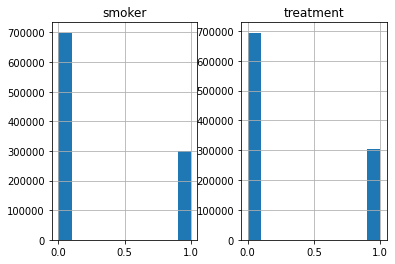

In [5]:
df.iloc[:,:2].hist()

#### Simple Random Sampling

In [6]:
sample_df = df.sample(5000)

array([[<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'treatment'}>]], dtype=object)

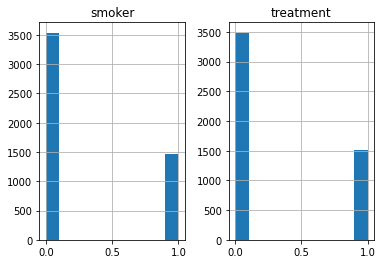

In [7]:
sample_df.iloc[:,:2].hist()

#### Stratified Sampling

In [8]:
X = df.iloc[:,:2]
y = df.iloc[:,2]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [10]:
import matplotlib.pyplot as plt

(array([[699177.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 300823.],
        [694225.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 305775.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

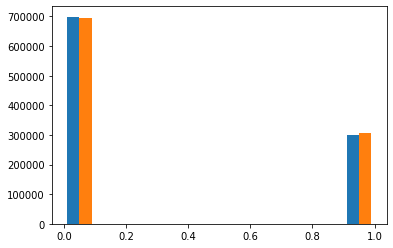

In [11]:
plt.hist(X)

(array([[524409.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 225591.],
        [520605.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 229395.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

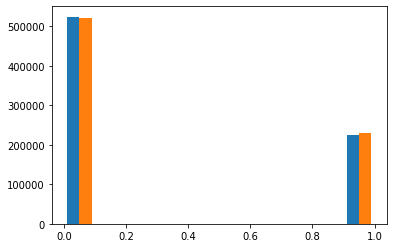

In [12]:
plt.hist(X_train)

(array([553574.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 196426.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

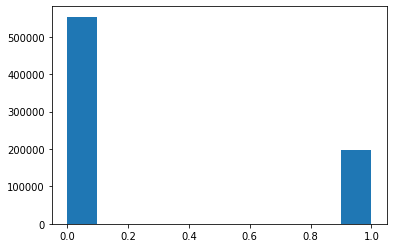

In [13]:
plt.hist(y_train)

(array([184525.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  65475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

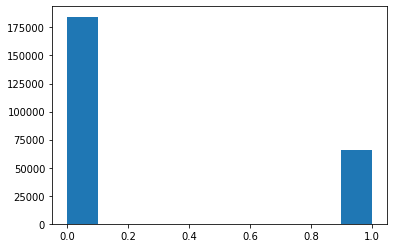

In [14]:
plt.hist(y_test)

#### Reservoir Sampling'

Let us assume we have to sample 5 objects out of an infinite stream such that each element has an equal probability of getting selected.

In [15]:
import random

def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

In [16]:
# Create as stream generator
stream = generator(10000)
stream

<generator object generator at 0x7f72d15490e0>

In [17]:
# Doing Reservoir Sampling from the stream
k=5
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
            reservoir[random.choice(range(0,k))] = element
                       

In [19]:
print(reservoir)

[7128, 1441, 6312, 3294, 8106]


#### Random Undersampling and Oversampling

In [20]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)
X = pd.DataFrame(X)
X['target'] = y

In [22]:
# X

<AxesSubplot:>

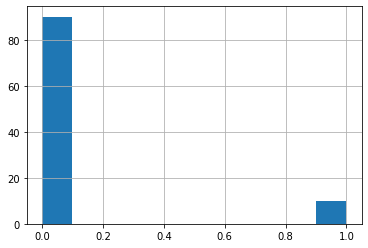

In [23]:
X['target'].hist()

In [24]:
num_0 = len(X[X['target']==0])
num_1 = len(X[X['target']==1])

print(num_0,num_1)

90 10


In [25]:
# random undersample
undersampled_data = pd.concat([X[X['target']==0].sample(num_1), 
                               X[X['target']==1]])
print(len(undersampled_data))

20


<AxesSubplot:>

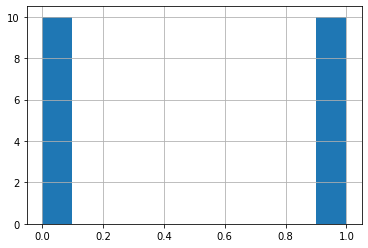

In [26]:
undersampled_data['target'].hist()

In [28]:
# random oversample
oversampled_data = pd.concat([X[X['target']==0], 
                    X[X['target']==1].sample(num_0, replace=True) ])
print(len(oversampled_data))

180


<AxesSubplot:>

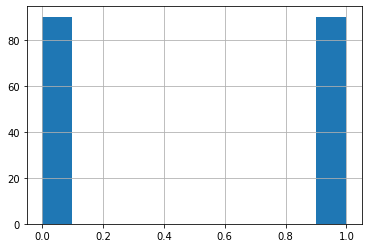

In [30]:
oversampled_data['target'].hist()

In [31]:
df = df.sample(2000)
X = df.iloc[:,:2]
y = df.iloc[:,2]
n_0 = df.loc[df['smoker']==0,].shape[0]
n_1 = df.loc[df['smoker']==1,].shape[0]
n_0, n_1

(1442, 558)

In [32]:
df_under = pd.concat([df.loc[df['smoker']==0,].sample(n_1), 
                      df.loc[df['smoker']==1,]])
df_under.shape

(1116, 3)

In [33]:
df_over = pd.concat([df.loc[df['smoker']==0,], 
                     df.loc[df['smoker']==1,].sample(n_0, replace=True)])
df_over.shape

(2884, 3)

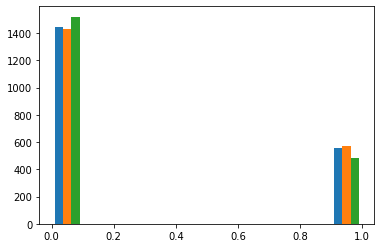

In [34]:
plt.hist(df);

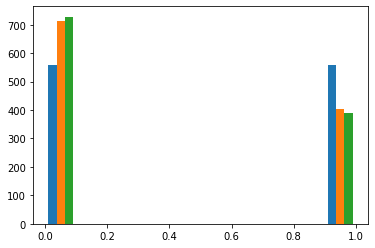

In [35]:
plt.hist(df_under);

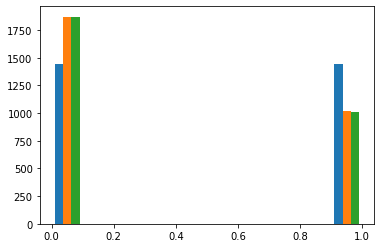

In [36]:
plt.hist(df_over);

#### Undersampling and Oversampling using imbalanced-learn

Undersampling using Tomek Links:

In [37]:
from imblearn.under_sampling import TomekLinks

In [38]:
df = df.sample(1000)
X = df.iloc[:,:2]
y = df.iloc[:,2]

In [44]:
tl = TomekLinks(sampling_strategy='all')
X_tl, y_tl = tl.fit_resample(X, y)

In [45]:
X.shape

(1000, 2)

In [46]:
X_tl.shape

(1000, 2)

In [51]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=5, n_clusters_per_class=1,
    n_samples=2000, random_state=10
)
X = pd.DataFrame(X)
# X['target'] = y

In [52]:
tl = TomekLinks(sampling_strategy='all')
X_tl, y_tl = tl.fit_resample(X, y)

In [53]:
X

,0,1,2,3,4
0,-0.300431,2.743623,-1.668624,-0.158884,-2.028424
1,-1.416955,0.444884,-0.083284,0.056711,-0.428537
2,-0.656180,-0.559487,-0.442037,1.050268,-1.504402
3,-0.674820,-0.589581,-0.564160,0.824297,-1.484781
4,-0.932148,0.072430,-1.087150,-0.576109,-1.097841
...,...,...,...,...,...
1995,-1.169177,1.826104,0.337431,1.185924,-0.733842
1996,-1.821701,-1.318251,0.462608,0.063047,0.171394
1997,-0.590174,2.550448,-0.482356,0.477820,-1.094828
1998,-1.879125,-0.124437,1.260463,1.231785,0.248062


In [54]:
X_tl

,0,1,2,3,4
0,-0.300431,2.743623,-1.668624,-0.158884,-2.028424
1,-1.416955,0.444884,-0.083284,0.056711,-0.428537
2,-0.656180,-0.559487,-0.442037,1.050268,-1.504402
3,-0.674820,-0.589581,-0.564160,0.824297,-1.484781
4,-0.932148,0.072430,-1.087150,-0.576109,-1.097841
...,...,...,...,...,...
1987,-1.169177,1.826104,0.337431,1.185924,-0.733842
1988,-1.821701,-1.318251,0.462608,0.063047,0.171394
1989,-0.590174,2.550448,-0.482356,0.477820,-1.094828
1990,-1.879125,-0.124437,1.260463,1.231785,0.248062


In [ ]:
# X_tl

Oversampling using SMOTE:

In [56]:
df = pd.read_csv("sample")
df = df.sample(1000)
X = df.iloc[:,:2]
y = df.iloc[:,2]

(array([[728.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 272.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 310.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

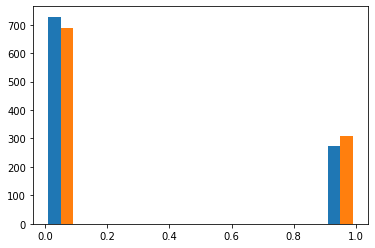

In [57]:
plt.hist(X)
# plt.hist(y)

In [58]:
n_0 = df.loc[df['smoker']==0,].shape[0]
n_1 = df.loc[df['smoker']==1,].shape[0]
n_0, n_1

(728, 272)

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

(array([[ 896.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          630.],
        [1012.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          514.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

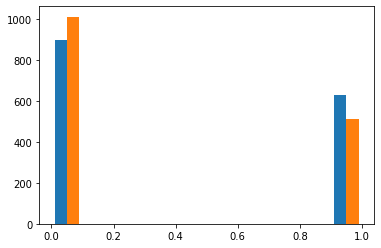

In [60]:
plt.hist(X_sm)
# plt.hist(y_sm)

There are a variety of other methods in the imblearn package for both undersampling(Cluster Centroids, NearMiss, etc.) and oversampling(ADASYN and bSMOTE) that you can check out.

### Multiple hypothesis testing

In [61]:
import pandas as pd#Import the data samples
from multipy.data import neuhaus#Import the FWER methods 
from multipy.fwer import bonferroni, holm_bonferroni#Import the FDR methods (LSU is the other name for BH method)
from multipy.fdr import lsu

Let’s assume we have 15 features, and we already did our hypothesis testing for each feature.

In [62]:
pvals = neuhaus()
df = pd.DataFrame({'Features': ['Feature {}'.format(i) for i in range(1,len(pvals)+1  )], 'P-value':pvals})
df

,Features,P-value
0,Feature 1,0.0001
1,Feature 2,0.0004
2,Feature 3,0.0019
3,Feature 4,0.0095
4,Feature 5,0.0201
5,Feature 6,0.0278
6,Feature 7,0.0298
7,Feature 8,0.0344
8,Feature 9,0.0459
9,Feature 10,0.3240


In [64]:
# Now, let’s try the Bonferroni Correction to our data sample
#Set the alpha level for your desired significant level
df['bonferroni'] = bonferroni(pvals, alpha = 0.05)
df

,Features,P-value,bonferroni
0,Feature 1,0.0001,True
1,Feature 2,0.0004,True
2,Feature 3,0.0019,True
3,Feature 4,0.0095,False
4,Feature 5,0.0201,False
5,Feature 6,0.0278,False
6,Feature 7,0.0298,False
7,Feature 8,0.0344,False
8,Feature 9,0.0459,False
9,Feature 10,0.3240,False


In [ ]:
# bonferroni(pvals, alpha = 0.05)

In [65]:
df['holm_bonferroni'] = holm_bonferroni(pvals, alpha = 0.05)
df

,Features,P-value,bonferroni,holm_bonferroni
0,Feature 1,0.0001,True,True
1,Feature 2,0.0004,True,True
2,Feature 3,0.0019,True,True
3,Feature 4,0.0095,False,False
4,Feature 5,0.0201,False,False
5,Feature 6,0.0278,False,False
6,Feature 7,0.0298,False,False
7,Feature 8,0.0344,False,False
8,Feature 9,0.0459,False,False
9,Feature 10,0.3240,False,False


In [66]:
from statsmodels.stats.multitest import multipletests
reject, p_value_corrected, sidak, bonferroni =  multipletests(pvals, alpha = 0.05, method='sidak')
df['sidak'] = reject
df['sidak_p'] = p_value_corrected

/home/xenakas/.local/lib/python3.10/site-packages/statsmodels/stats/multitest.py:155: RuntimeWarning: divide by zero encountered in log1p
  pvals_corrected = -np.expm1(ntests * np.log1p(-pvals))


In [68]:
# df

In [69]:
reject, p_value_corrected, sidak, bonferroni =  multipletests(pvals, alpha = 0.05, method='holm-sidak')
df['holm-sidak'] = reject
df['holm-sidak_p'] = p_value_corrected

/home/xenakas/.local/lib/python3.10/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [70]:
df

,Features,P-value,bonferroni,holm_bonferroni,sidak,sidak_p,holm-sidak,holm-sidak_p
0,Feature 1,0.0001,True,True,True,0.001499,True,0.001499
1,Feature 2,0.0004,True,True,True,0.005983,True,0.005585
2,Feature 3,0.0019,True,True,True,0.028124,True,0.024420
3,Feature 4,0.0095,False,False,False,0.133403,False,0.108228
4,Feature 5,0.0201,False,False,False,0.262561,False,0.200167
5,Feature 6,0.0278,False,False,False,0.344860,False,0.245679
6,Feature 7,0.0298,False,False,False,0.364787,False,0.245679
7,Feature 8,0.0344,False,False,False,0.408494,False,0.245679
8,Feature 9,0.0459,False,False,False,0.505794,False,0.280290
9,Feature 10,0.3240,False,False,False,0.997187,False,0.904571


In [71]:
#set the q parameter to the FDR rate you want
df['benjamin_hochberg'] = lsu(pvals, q=0.05) # q = desired FDR

reject, p_value_corrected, sidak_corr, bonf_corr = multipletests(pvals, alpha=0.05, method='fdr_bh')
df['benjamin_hochberg_p'] = p_value_corrected
df

,Features,P-value,bonferroni,holm_bonferroni,sidak,sidak_p,holm-sidak,holm-sidak_p,benjamin_hochberg,benjamin_hochberg_p
0,Feature 1,0.0001,True,True,True,0.001499,True,0.001499,True,0.001500
1,Feature 2,0.0004,True,True,True,0.005983,True,0.005585,True,0.003000
2,Feature 3,0.0019,True,True,True,0.028124,True,0.024420,True,0.009500
3,Feature 4,0.0095,False,False,False,0.133403,False,0.108228,True,0.035625
4,Feature 5,0.0201,False,False,False,0.262561,False,0.200167,False,0.060300
5,Feature 6,0.0278,False,False,False,0.344860,False,0.245679,False,0.063857
6,Feature 7,0.0298,False,False,False,0.364787,False,0.245679,False,0.063857
7,Feature 8,0.0344,False,False,False,0.408494,False,0.245679,False,0.064500
8,Feature 9,0.0459,False,False,False,0.505794,False,0.280290,False,0.076500
9,Feature 10,0.3240,False,False,False,0.997187,False,0.904571,False,0.486000
